In [1]:
## LIBRARIES 
import os
import sys
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Modelo

Por cada celda:

En loop:

(0)Poblción inicial

(1)+Inmigrantes 

(2)+Crecimiento Natural

(3)¿Rebasa Población ideal?

(3.a) No. $\rightarrow$ ir a (2)

(3.b) Si. $\rightarrow$ contar cuanto se pasa, y restar una porción. Ésta se suma con la de las otras celdas y se reparte en cada celda con probabilidad
$$ P_o(t)=P_I(t)+g(r) $$
con
$$ g(r)=e^{-br}$$
o
$$ g(r)=e^{br-cr^2}$$

y

$$ P_I(t)=\frac{p_n(t)}{p_T(t)} $$

y se va a (1)



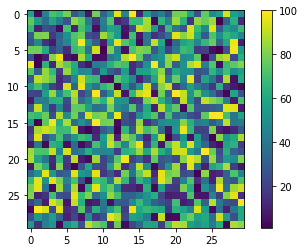

In [23]:
#Data:
#Distribución de Población
n=30
p = np.random.uniform(1, 100, (n, n)).round(0)
plt.imshow(p)
plt.colorbar()
plt.show()
#p

In [3]:
poblacion_Total=np.sum(p)
poblacion_Total

44494.0

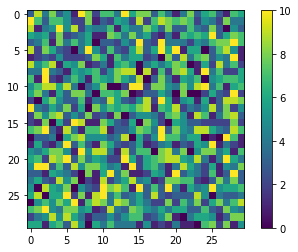

In [4]:
#Distribución de Población nueva inicial
n=30
p_n = np.random.uniform(0, 10, (n, n)).round(0)
plt.imshow(p_n)
plt.colorbar()
plt.show()
#p_n

In [5]:
#Distribución de distancias
def distancia(A,c1,c2):
    n=int(np.sqrt(np.size(A)))
    d=np.copy(A)
    for i in range(n):
        for j in range(n):
            dist=np.sqrt((i-c1)**2+(j-c2)**2)
            d[i][j]=dist
            
    return d
center=np.array([15,15])
dist=distancia(p,float(center[0]),float(center[1]))

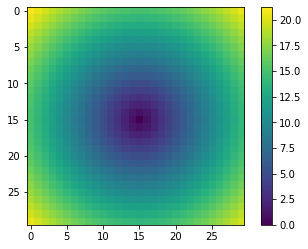

In [6]:
plt.imshow(dist)
plt.colorbar()
plt.show()

In [7]:
def crecimiento_natural_e(t,p,b):
    return p*np.exp(b*t).round(0)
def crecimiento_natural_lin(t,p,b):
    return b*p*t

In [44]:
def distrubucion(p,dist,p_n,T,b,p_id=150,Delta_r=0,Delta_o=0):
    poblacion=np.copy(p)
    p_inm=np.copy(p_n)
    n=int(np.sqrt(np.size(p)))
    #Población total
    p_T=np.sum(p)
    #Población ideal
    #p_id=150
    #Población rechazada
    #p_r=[0,0]
    
    #Probabilidad de ocupación (parte exponencial)
    p_oe=np.zeros((n,n))
    for i in range(n):
        for j in range(n):    
            #distancia al centro
            r=dist[i][j]
            p_oe[i][j]=np.exp(-b*r)
            
    p_oe=p_oe/np.sum(p_oe)
    
    #Main loop
    for t in range(T):
        p_e=np.zeros((n,n))
        for i in range(n):
            for j in range(n):                                
                #Crecimiento natural
                #poblacion[i][j]=poblacion[i][j]+crecimiento_natural_lin(t,poblacion[i][j],0.001)
                #poblacion[i][j]=poblacion[i][j]+np.random.uniform(5,10)
                poblacion[i][j]=poblacion[i][j]+5
                
                #Crecimiento por Inmigración
                poblacion[i][j]=poblacion[i][j]+p_inm[i][j]
                
                #Rechazo de población
                p_r=poblacion[i][j]-p_id
                if (p_r>0):
                    
                    #p_re=(p_r-1+np.random.uniform(0,Delta_r)*p_r)*poblacion[i][j]
                    #p_re=(p_r-1)*poblacion[i][j]
                    #p_re=p_r+np.random.uniform(0,Delta_r)*poblacion[i][j]
                    p_re=p_r*Delta_r
                    poblacion[i][j]=poblacion[i][j]-p_re
                    
                    p_e[i][j]=p_re
                    
        #Población migrante total:
        p_m=np.sum(p_e)
        
        #Migración por Probabilidad de Ocupación
        p_o=np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                #probabilidad de inmigración
                if (poblacion[i][j]>0):
                    p_I=p_inm[i][j]/poblacion[i][j]
                if (poblacion[i][j]<=0.01):
                    p_I=0.1
                #Probabilidad de ocupación
                #p_o[i][j]=p_oe[i][j]*(p_I+np.random.uniform(0,Delta_o))
                #p_o=np.exp(-b*r)*(p_I)
                #p_o[i][j]=p_oe[i][j]*p_I
                #p_o[i][j]=p_oe[i][j]
                p_o[i][j]=p_oe[i][j]+p_I
        #normalizar p_o:
        if (np.sum(p_o)==0):
            p_o=p_o
        else:
            p_o=p_o/np.sum(p_o)
        
        #repartir población migrante:
        for i in range(n):
            for j in range(n):
                p_inm[i][j]=p_m*p_o[i][j]
                
    return poblacion, p_inm,p_o

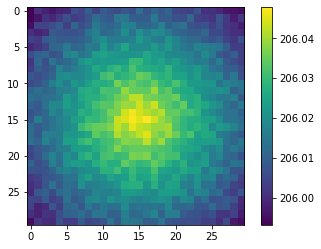

array([[205.99316029, 206.00100361, 205.99797827, 205.99676045,
        205.99852125, 205.99943969, 206.00644427, 206.00412723,
        206.00980032, 206.0039362 , 206.00876296, 206.00663954,
        206.00588503, 206.00790005, 206.00652138, 206.01310827,
        206.00737406, 206.01065817, 206.00829211, 206.01086589,
        206.00479628, 206.00390243, 206.00351378, 206.00744845,
        206.00073603, 206.00117047, 205.99938472, 205.99660636,
        205.99602503, 205.9953123 ],
       [205.99362905, 205.9963052 , 206.00115656, 205.99914176,
        206.00239175, 206.00657273, 206.0027014 , 206.00410137,
        206.00730717, 206.01271845, 206.00973978, 206.00793281,
        206.01485291, 206.01476975, 206.00941481, 206.00926597,
        206.00897054, 206.01568132, 206.00852184, 206.00964005,
        206.00693852, 206.00637223, 206.0112373 , 206.00394978,
        206.0027536 , 206.00134179, 206.00752519, 206.00235571,
        205.99745322, 206.00233213],
       [205.99533334, 206.0042

In [53]:
T=75
b=0.01
Delta_r=0.8
Delta_o=0
p_id=150
Prueba,p_inm,p_o=distrubucion(p,dist,p_n,T,b,p_id,Delta_r,Delta_o)
plt.imshow(Prueba)
plt.colorbar()
plt.show()
Prueba